For today's plot I will be extracting the counts of bike hires for each of the four seasons, and plotting this in a pie chart, with each segment representing the proportion of all hires made in each season.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bikes = pd.read_csv('./data/SeoulBikeData.csv')
bikes.head(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


Use Pandas' groupby function to sum the daily bike hires depending on which season they were in.

In [3]:
bike_season__counts = bikes.groupby(['Seasons']).sum().reset_index()[['Seasons','Rented Bike Count']]
bike_season__counts.columns = ['Seasons', 'NumBikeHires']
bike_season__counts

,Seasons,NumBikeHires
0,Autumn,1790002
1,Spring,1611909
2,Summer,2283234
3,Winter,487169


Let's have a quick look at how the data will look in a pie chart

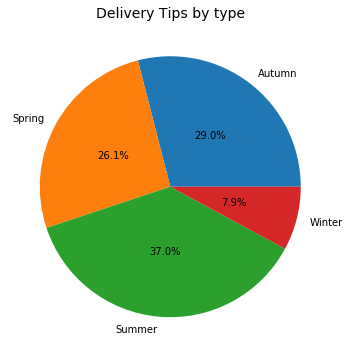

In [4]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=bike_season__counts.NumBikeHires, autopct="%.1f%%", labels=bike_season__counts.Seasons, pctdistance=0.5)
plt.title("Delivery Tips by type", fontsize=14);


Finally, let's write the data to a csv file.

In [5]:
bike_season__counts.to_csv('./data/seoul_sasonal_bike_counts.csv')